In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import calendar
import scipy
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import scipy
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")


In [ ]:
uploaded = files.upload()

Saving cinemaTicket_Ref.csv to cinemaTicket_Ref.csv


In [ ]:
df = pd.read_csv('cinemaTicket_Ref.csv')

In [ ]:
df.shape

(142524, 14)

In [ ]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [ ]:
df = df[(df['cinema_code']!=637)&(df['cinema_code']!=543)]
df['occu_perc']=df['occu_perc'].fillna(method='ffill')
df['capacity']=df['capacity'].fillna(method='ffill')

df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [ ]:
ar = [10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]

cl = [df.columns.values[x] for x in ar]
df = df[cl]

In [ ]:
df['date'] = pd.to_datetime(df['date'])
Weekday = []
Week = []

for i in range(len(df)):
  Weekday.append(df['date'].iloc[i].weekday())
  Week.append(df['date'].iloc[i].isocalendar()[1])

df['weekday'] = Weekday
df['week'] = Week

df['total_sales'] = df['total_sales']/1000000
df['ticket_price'] = df['ticket_price']/10000
df['capacity'] = df['capacity']/100
df.sort_values(['date'], inplace=True)

In [ ]:
df.head()

,date,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,weekday,week
46143,2018-02-21,1471,448,32.03,267,0,2,47.76,11.996255,267,5.590452,2,1,21,2,8
46142,2018-02-23,1471,518,0.18,3,0,1,2.07,6.000000,3,1.449275,2,1,23,4,8
120940,2018-03-14,1481,448,9.90,83,0,6,7.06,11.927711,83,11.756374,3,1,14,2,11
47524,2018-03-14,1480,450,2.52,21,0,3,6.60,12.000000,21,3.181818,3,1,14,2,11
47523,2018-03-14,1480,33,4.20,42,0,6,1.94,10.000000,42,21.649485,3,1,14,2,11


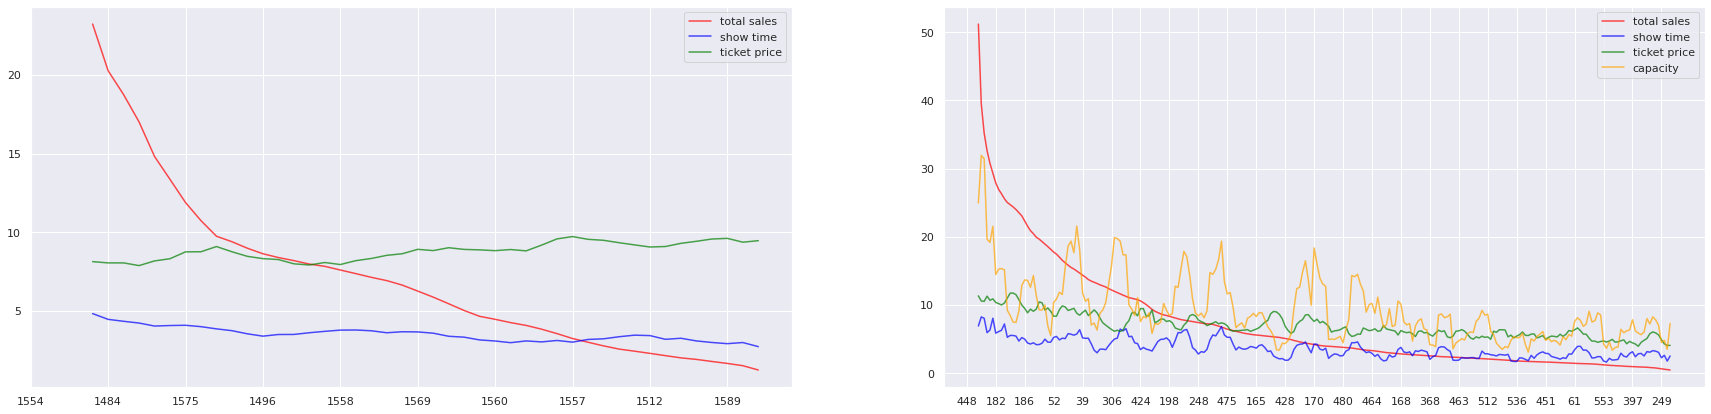

In [ ]:
df1 = df.groupby(['film_code'], as_index=False).mean().sort_values(['total_sales'], ascending=False)[['film_code', 'total_sales', 'show_time', 'ticket_price']]
df1.reset_index(inplace=True)
df2 = df.groupby(['cinema_code'], as_index=False).mean().sort_values(['total_sales'], ascending=False)[['cinema_code', 'total_sales', 'show_time', 'ticket_price', 'capacity']]
df2.reset_index(inplace=True)


plt.figure(figsize=(30,7))

plt.subplot(1,2,1)
plt.plot(df1.index, df1['total_sales'].rolling(5).mean(), color='red', label='total sales', alpha=0.7)
plt.plot(df1.index, df1['show_time'].rolling(5).mean(), color='blue', label='show time', alpha=0.7)
plt.plot(df1.index, df1['ticket_price'].rolling(5).mean(), color='green', label='ticket price', alpha=0.7)
xtk1 = list(df1.index)[0::5]
plt.xticks(xtk1, labels=[df1['film_code'].loc[x] for x in xtk1])
plt.legend()

plt.subplot(1,2,2)
plt.plot(df2.index, df2['total_sales'].rolling(5).mean(), color='red', label='total sales', alpha=0.7)
plt.plot(df2.index, df2['show_time'].rolling(5).mean(), color='blue', label='show time', alpha=0.7)
plt.plot(df2.index, df2['ticket_price'].rolling(5).mean(), color='green', label='ticket price', alpha=0.7)
plt.plot(df2.index, df2['capacity'].rolling(5).mean(), color='orange', label='capacity', alpha=0.7)
xtk2 = list(df2.index)[0::10]
plt.xticks(xtk2, labels=[df2['cinema_code'].loc[x] for x in xtk2])
plt.legend()

plt.show()


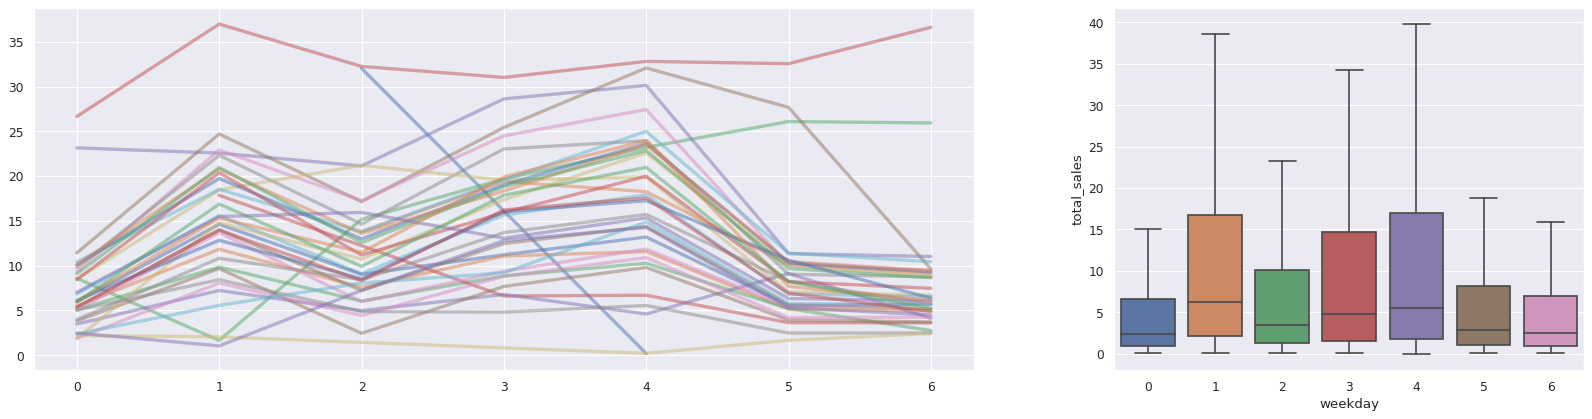

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,6), dpi= 80, gridspec_kw={'width_ratios': [2, 1]})

for wk in np.sort(df['week'].unique()):
  sdf = df[df['week']==wk]
  sdf = sdf.groupby(['weekday'], as_index=False).mean()
  ax[0].plot(sdf['weekday'], sdf['total_sales'], label='week '+str(wk), alpha=0.5, linewidth=3)

sns.boxplot(x='weekday', y='total_sales', data=df, ax=ax[1], showfliers=False)

plt.show()

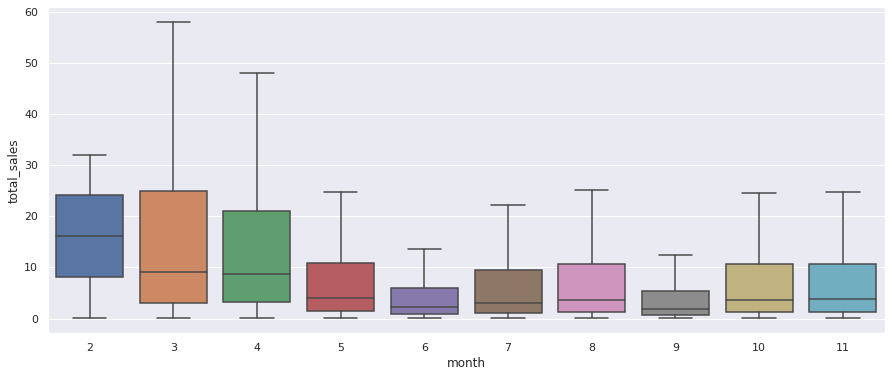

In [ ]:
plt.figure(figsize=(15,6))

sns.boxplot(x='month', y='total_sales', data=df, showfliers=False)

plt.show()

In [ ]:
top7 = df1['film_code'].loc[0:6]
print("Top 7 highest selling movies' codes:",list(top7))

Top 7 highest selling movies' codes: [1554, 1483, 1573, 1576, 1482, 1484, 1485]


In [ ]:
def draw_patch(data, code):
  slice_df = data[data['film_code']==code]
  slice_df = slice_df.groupby(['date'], as_index=False).mean()
  anchor = (mdates.date2num(slice_df['date'].loc[0]),0)
  width = len(slice_df)
  height = int(slice_df['total_sales'].mean())
  xpos = slice_df['date'].loc[int(width/2)]
  ypos = int(height/2)

  return anchor, width, height, xpos, ypos

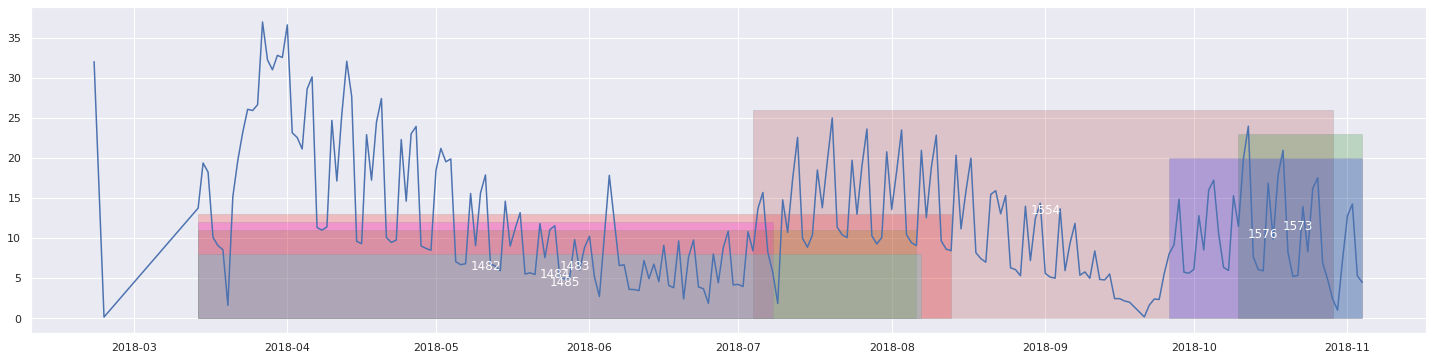

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,6))
ddf = df.groupby(['date'], as_index=False).mean()
ax.plot(ddf['date'],ddf['total_sales'].rolling(1).mean())
clr = ['brown', 'red', 'green', 'blue', 'magenta', 'olive', 'cyan']
colors = {}
for mc in range(len(top7)):
  colors[top7[mc]] = clr[mc]

for cd in top7:
  anch, w, h, xpos, ypos = draw_patch(df, cd)
  rect = Rectangle(anch, width=w, height=h, facecolor =colors[cd], edgecolor ='0.5', alpha = 0.2)
  ax.add_patch(rect)
  ax.text(xpos,ypos,str(cd), size='medium', weight='medium', ha='center', c='white')


plt.show()

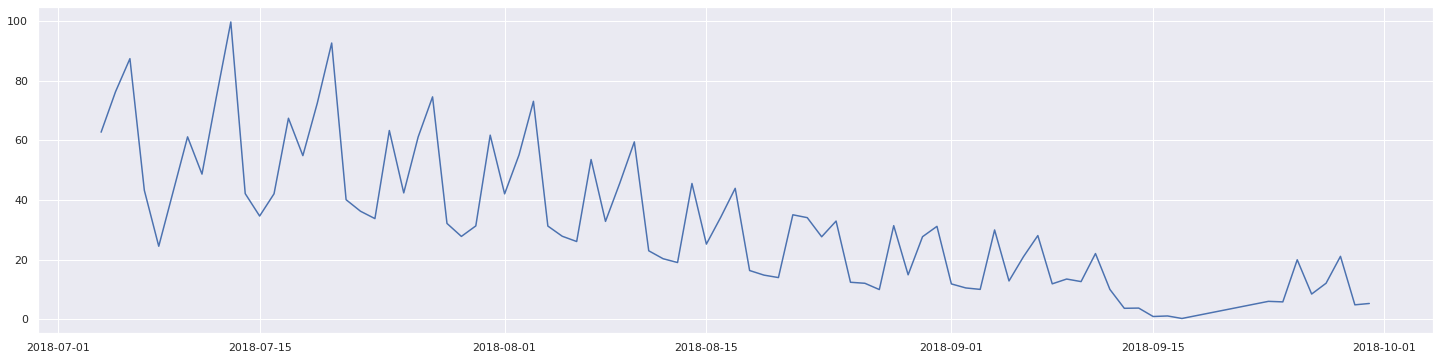

In [ ]:
sm_df = df[(df['film_code']==1554) & ((df['month']>=7)&(df['month']<=9))][['date', 'total_sales']]
sm_df = sm_df.groupby(['date'], as_index=True).mean()

plt.figure(figsize=(25,6))

plt.plot(sm_df['total_sales'])

plt.show()

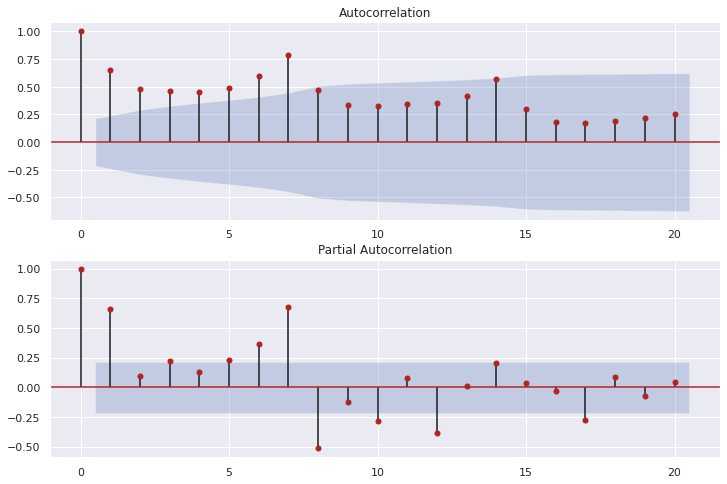

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sm_df['total_sales'], ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sm_df['total_sales'], ax=ax2,color='firebrick')

In [ ]:
result = adfuller(sm_df['total_sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.9072780680429648
p-value: 0.7855661972925894
Critical Values:
	1%: -3.5274258688046647
	5%: -2.903810816326531
	10%: -2.5893204081632653


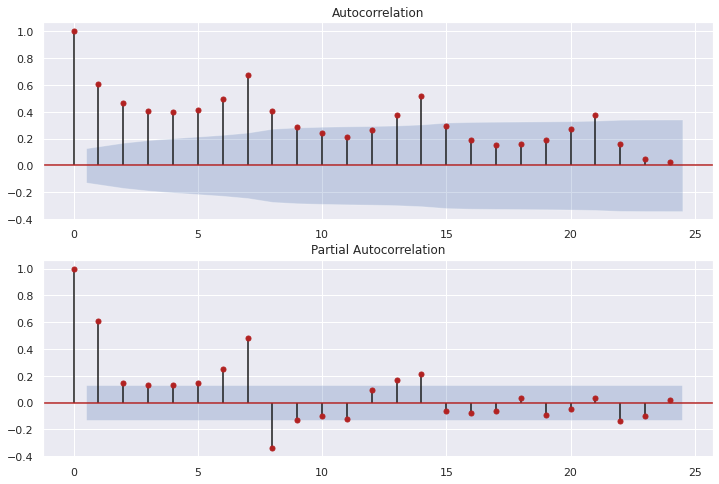

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ddf.total_sales, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ddf.total_sales, ax=ax2,color='firebrick')

In [ ]:
result = adfuller(df.groupby(['date']).mean().total_sales)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.1304554339760093
p-value: 0.23244593044712558
Critical Values:
	1%: -3.460567372610299
	5%: -2.874829809033386
	10%: -2.573853225954421


In [ ]:
diff1 = []
for i in range(len(ddf)-1):
  diff1.append(ddf['total_sales'].loc[i+1]-ddf['total_sales'].loc[i])

result = adfuller(diff1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.177449933160004
p-value: 6.577916709105001e-08
Critical Values:
	1%: -3.460567372610299
	5%: -2.874829809033386
	10%: -2.573853225954421


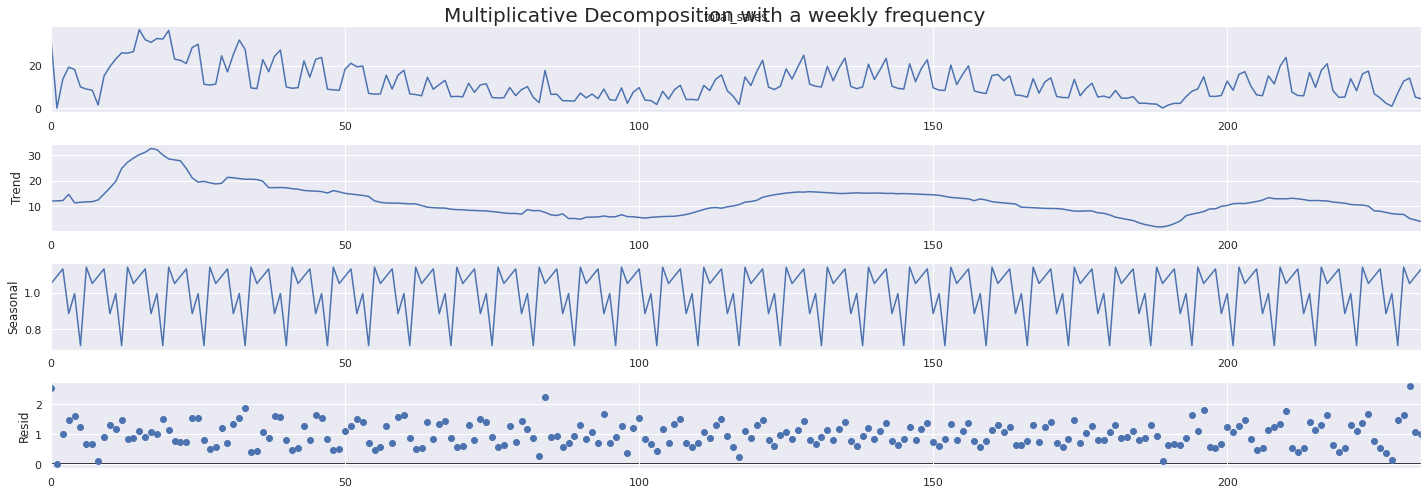

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'figure.figsize': (20,7)})

result_mul = seasonal_decompose(ddf.total_sales, period=7, model='multiplicative', extrapolate_trend='freq')
result_mul.plot().suptitle('Multiplicative Decomposition with a weekly frequency', fontsize=20)

plt.show()


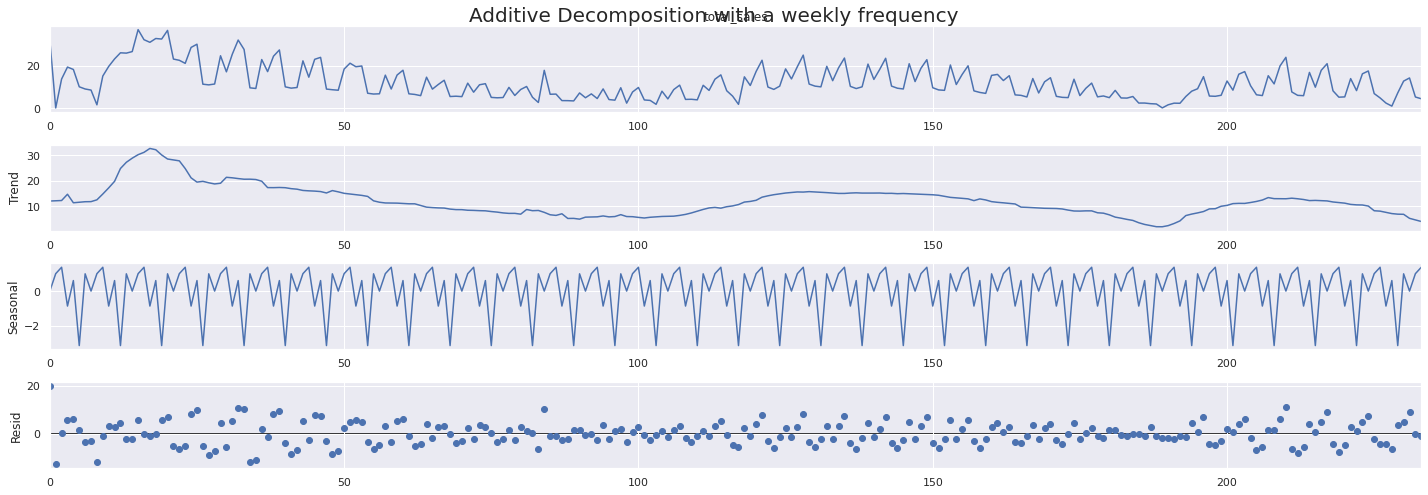

In [ ]:
result_add = seasonal_decompose(ddf.total_sales, period=7, model='additive', extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decomposition with a weekly frequency', fontsize=20)

plt.show()

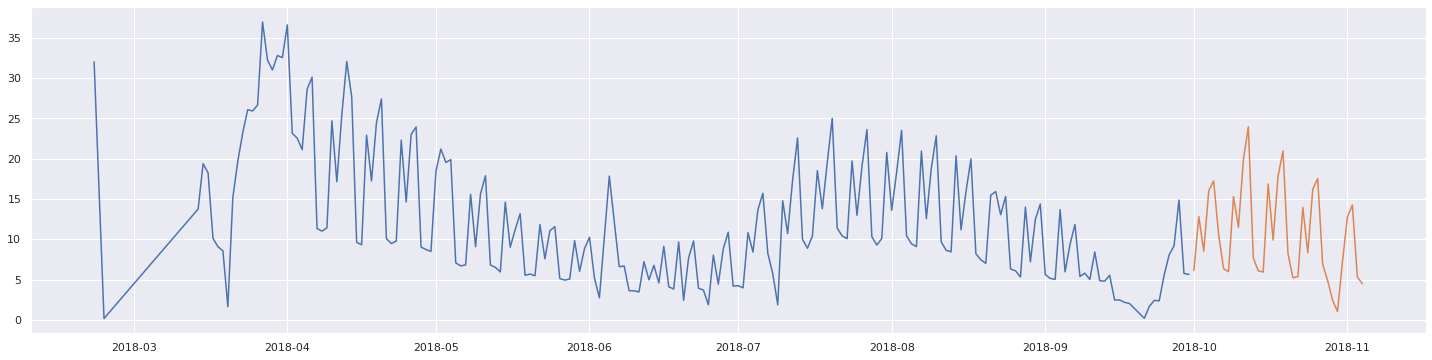

In [ ]:
ar_train = ddf[ddf['month']<10][['date', 'total_sales']]
ar_test = ddf[ddf['month']>=10][['date', 'total_sales']]
ar_train.set_index('date', inplace=True)
ar_test.set_index('date', inplace=True)
plt.figure(figsize=(25,6))
plt.plot(ar_train)
plt.plot(ar_test)
plt.show()

In [ ]:
for ar in range(7,15):
  for ma in range(1,5):
    for d in [1,2]:
      try:
        model = ARIMA(ar_train, order=(ar,d,ma))
        model_fit = model.fit()
        print((ar, ma), model_fit.aic)
      except:
        print('skip')
        continue

(7, 1) 1201.592873652347
(7, 1) 1204.6179979294777
(7, 2) 1203.5549655830023
(7, 2) 1205.3940500598471
skip
skip
(7, 4) 1192.9256323145034
skip
(8, 1) 1199.6988682717763
(8, 1) 1205.675204560131
(8, 2) 1181.347191710547
(8, 2) 1206.186696563133
(8, 3) 1193.213501751647
skip
skip
skip
(9, 1) 1199.720835944748
(9, 1) 1206.9906437263262
(9, 2) 1181.660573300478
(9, 2) 1204.904585339335
(9, 3) 1182.8904036126385
skip
(9, 4) 1182.8940532382144
skip
(10, 1) 1195.1906204395445
(10, 1) 1217.714456925807
(10, 2) 1181.555539214056
(10, 2) 1211.5161369311031
(10, 3) 1187.9772280767047
(10, 3) 1198.8659950874194
(10, 4) 1181.5848619205844
skip
(11, 1) 1182.2227284642072
(11, 1) 1203.4077107999642
(11, 2) 1195.2235228225347
(11, 2) 1186.7260741262253
(11, 3) 1207.2790042251572
(11, 3) 1185.7150602406007
(11, 4) 1191.2829360378573
(11, 4) 1185.8441777841024
(12, 1) 1179.3662037276379
skip
(12, 2) 1181.6910265948804
skip
(12, 3) 1203.065741583424
(12, 3) 1187.1465173232068
(12, 4) 1208.2898959688368


In [ ]:
model = ARIMA(ar_train, order=(14,1,4))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.total_sales   No. Observations:                  198
Model:                ARIMA(14, 1, 4)   Log Likelihood                -568.680
Method:                       css-mle   S.D. of innovations              4.141
Date:                Thu, 08 Dec 2022   AIC                           1177.361
Time:                        22:31:26   BIC                           1243.126
Sample:                             1   HQIC                          1203.980
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0760      0.085     -0.891      0.373      -0.243       0.091
ar.L1.D.total_sales      0.9262      0.163      5.691      0.000       0.607       1.245
ar.L2.D.tota

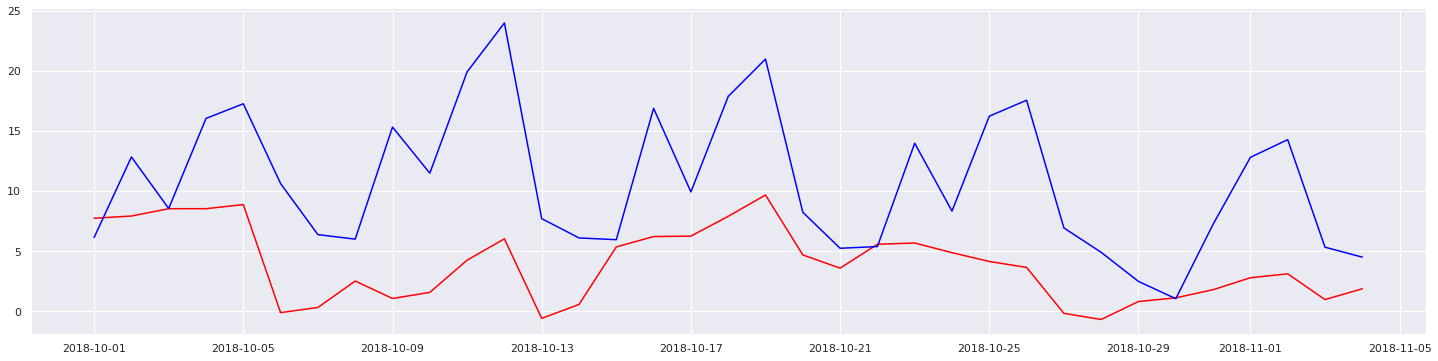

In [ ]:
plt.figure(figsize=(25,6))
fc, se, conf = model_fit.forecast(len(ar_test), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=ar_test.index)
plt.plot(fc_series, color='red')
plt.plot(ar_test, color='blue')

In [ ]:
ddf.columns.values

array(['date', 'film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price',
       'ticket_use', 'capacity', 'month', 'quarter', 'day', 'weekday',
       'week'], dtype=object)

In [ ]:
train = ddf[ddf['month']<10]
test = ddf[ddf['month']>=10]
x_train = train[['film_code', 'cinema_code', 'tickets_sold', 'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity', 'month', 'quarter', 'day', 'weekday', 'week']]
y_train = train['total_sales']
x_test = test[['film_code', 'cinema_code', 'tickets_sold', 'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity', 'month', 'quarter', 'day', 'weekday', 'week']]
y_test = test['total_sales']
x_val = test['date']

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=6,
                       learning_rate=0.03, 
                       random_state = 48)
reg.fit(x_train, y_train,         
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[21:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13.8974	validation_1-rmse:11.3448
[100]	validation_0-rmse:0.984792	validation_1-rmse:1.56916
[200]	validation_0-rmse:0.124549	validation_1-rmse:1.17175
[300]	validation_0-rmse:0.031134	validation_1-rmse:1.15251
[400]	validation_0-rmse:0.012086	validation_1-rmse:1.14982
[500]	validation_0-rmse:0.005527	validation_1-rmse:1.14941
[600]	validation_0-rmse:0.002765	validation_1-rmse:1.14945
[700]	validation_0-rmse:0.001465	validation_1-rmse:1.14959
[800]	validation_0-rmse:0.001256	validation_1-rmse:1.1496
[900]	validation_0-rmse:0.001256	validation_1-rmse:1.1496
[1000]	validation_0-rmse:0.001256	validation_1-rmse:1.1496
[1100]	validation_0-rmse:0.001252	validation_1-rmse:1.14959
[1200]	validation_0-rmse:0.001252	validation_1-rmse:1.14959
[1300]	validation_0-rmse:0.001252	validation_1-rmse:1.14959
[1400]	validation_0-rmse:0.001252	validation_1-rm

XGBRegressor(early_stopping_rounds=50, learning_rate=0.03, max_depth=6,
             n_estimators=1500, random_state=48)

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=x_train.columns,
             columns=['importance'])
fi

,importance
film_code,0.011422
cinema_code,0.000374
tickets_sold,0.361389
tickets_out,0.002133
show_time,0.000597
occu_perc,0.001071
ticket_price,0.020946
ticket_use,0.550357
capacity,0.000905
month,0.000526


In [ ]:
y_pred = reg.predict(x_test)

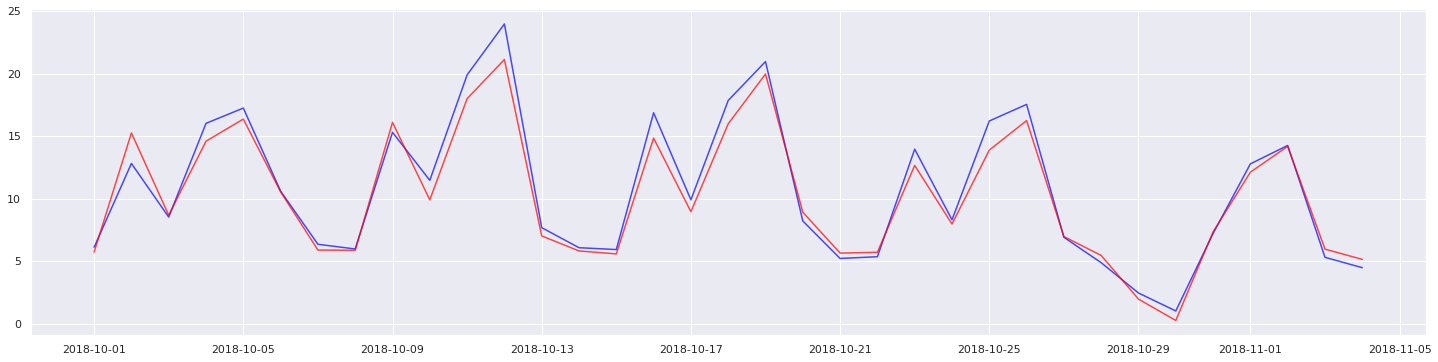

In [ ]:
plt.figure(figsize=(25,6))

plt.plot(test['date'], y_test, color='blue', alpha=0.7)
plt.plot(x_val, y_pred, color='red', alpha=0.7)


plt.show()